<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/04_classification/06_images_and_video/01-open_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# OpenCV

[OpenCV](https://opencv.org/) is an open-source computer vision library. It comes packaged with many powerful computer vision tools, including image and video processing utilities. The library has a lot of the same functionality as the [Python Image Library (PIL)](https://python-pillow.org/) but also includes some computer vision support that PIL doesn't include.

In this lesson we will learn how to use OpenCV to process images.

## Load an Image

Start by downloading a small (640x360) version of [this image of a car](https://pixabay.com/illustrations/car-sports-car-racing-car-speed-49278/) from Pixabay and then uploading it to this Colab.

**Be sure to load the small 640x360 version of the image for this lab.**

After loading the image, we can use matplotlib to view the image.

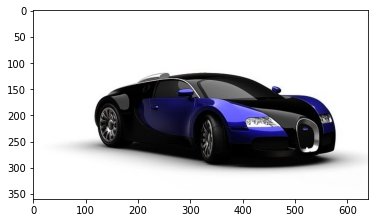

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

image_file = 'car-49278_640.jpg'

image = cv.imread(image_file)

plt.imshow(image)
plt.show()

### Color Ordering

Does something look off? Wasn't the car red when we downloaded the image?

OpenCV assumes the image is stored with blue-green-red (BGR) encoding instead of [red-green-blue (RGB)](https://en.wikipedia.org/wiki/RGB_color_model), but matplotlib assumes RGB. So, the reds and blues in the image are inverted when displayed.

Why does OpenCV assume images are BGR?

BGR was historically a popular storage format used by digital camera manufacturers and many software packages. At the time it was a good choice for a default. Defaults are difficult to change, so BGR is here to stay in OpenCV.

It doesn't really matter which format is used as long as the inputs to our model are consistent. However, it can be annoying to look at images with inverted colors. You just need to know how to tell OpenCV to fix it.

Luckily it is easy to change from BGR to RGB. We can just use `cvtColor`. There are [scores of conversions](https://docs.opencv.org/3.1.0/d7/d1b/group__imgproc__misc.html) possible.

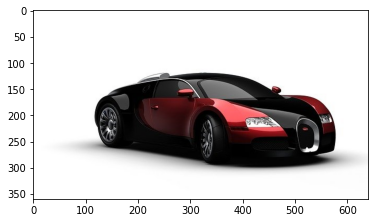

In [4]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## Drawing on Images

### Drawing Rectangles on Images

Suppose we want to draw a rectangle around objects we identify in an image. This can be done with the OpenCV `rectangle` method.

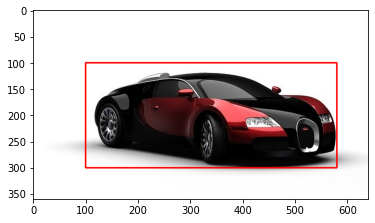

In [5]:
left = 100
right = 580
top = 100
bottom = 300

r = 255
g = 0
b = 0

cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=2)
plt.imshow(image)
plt.show()

### Drawing Text on Images

You can also draw text on images using `putText`.

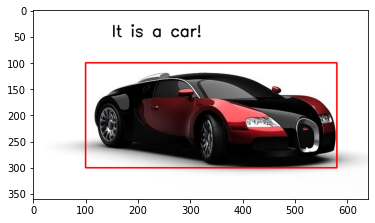

In [6]:
left = 150
top = 50

r = 0
g = 0
b = 0
scale = 1.0
thickness = 2

cv.putText(image, "It is a car!", (left, top), cv.FONT_HERSHEY_SIMPLEX, scale,
           [r, g, b], thickness)

plt.imshow(image)
plt.show()

## Image Scaling

Models are trained with images scaled to a specific size and are sensitive to the input size being consistent. One solution is to simply scale the image to the required size using the `resize` method.
 
In the example below, we scale the image to `300x300` pixels. This creates a pretty distorted image, which might affect the training and predictions made by the model.

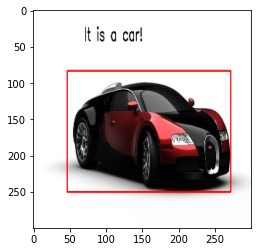

In [7]:
image_scaled = cv.resize(image, (300, 300))

plt.imshow(image_scaled)
plt.show()

## Cropping With Edge Detection

Another strategy is to crop the image using "edge detection", then scale the image after you have cropped it down. This strategy can be error-prone, but it can also be really helpful in isolating individual objects in an image.

In the case of the car image that we have loaded, cropping based on edge detection is both simple and effective. In images with more noise in the background, automatic cropping will be much more difficult.

To begin cropping, we'll rely on OpenCV's [Canny](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny#canny) detection algorithm.

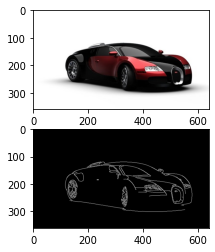

In [8]:
threshold = 200
image = cv.imread(image_file)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
edges = cv.Canny(image, threshold, threshold*2)

fig, (orig, edge) = plt.subplots(2)
orig.imshow(image, cmap='gray')
edge.imshow(edges, cmap='gray')
plt.show()

The `threshold` parameter is a tuning value set to the images you are processing. More details can be found on [Canny's Wikipedia page](https://en.wikipedia.org/wiki/Canny_edge_detector).

Let's see a few different thresholds in action.

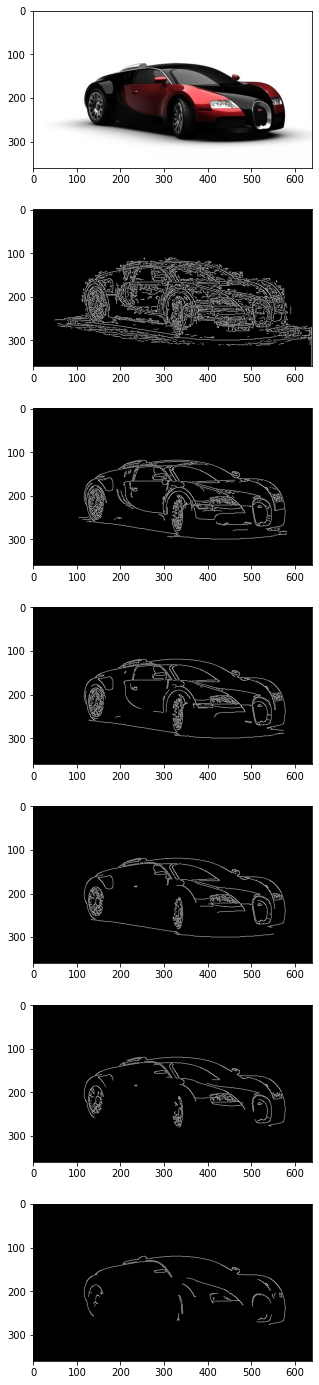

In [9]:
fig, (orig, t1, t50, t100, t200, t300, t500) = plt.subplots(7, figsize=(5, 25))

orig.imshow(image)
t1.imshow(cv.Canny(image, 10, 10*2), cmap='gray')
t50.imshow(cv.Canny(image, 50, 50*2), cmap='gray')
t100.imshow(cv.Canny(image, 100, 100*2), cmap='gray')
t200.imshow(cv.Canny(image, 200, 200*2), cmap='gray')
t300.imshow(cv.Canny(image, 300, 300*2), cmap='gray')
t500.imshow(cv.Canny(image, 500, 500*2), cmap='gray')
plt.show()

None of these settings do too badly, though a threshold of 10 has a lot of noise, and a threshold of 500 barely outlines the car. We have to remember that our goal is to build a bounding box around the car and crop on that bounding box.

Another consideration is that the edge detection algorithm is often more effective if the image is grayscale and if there is some blurring.
 
First let's convert the image to grayscale.

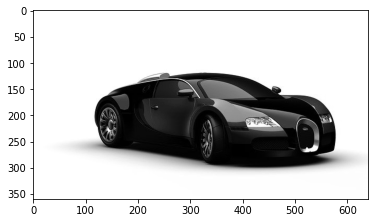

In [10]:
img_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
_ = plt.imshow(img_gray, cmap='gray')

And now we'll blur the image a bit.

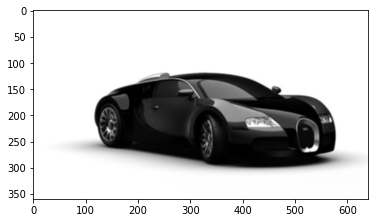

In [11]:
img_gray = cv.blur(img_gray, (3,3))
_ = plt.imshow(img_gray, cmap='gray')

Given this new grayscale and blurred image, we can run the edge detection algorithm again.

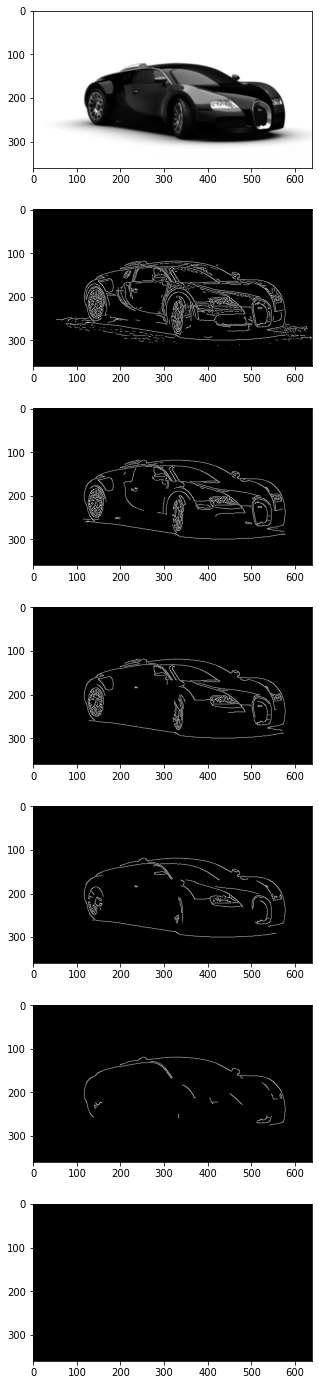

In [12]:
fig, (orig, t1, t50, t100, t200, t300, t500) = plt.subplots(7, figsize=(5, 25))

orig.imshow(img_gray, cmap='gray')
t1.imshow(cv.Canny(img_gray, 10, 10*2), cmap='gray')
t50.imshow(cv.Canny(img_gray, 50, 50*2), cmap='gray')
t100.imshow(cv.Canny(img_gray, 100, 100*2), cmap='gray')
t200.imshow(cv.Canny(img_gray, 200, 200*2), cmap='gray')
t300.imshow(cv.Canny(img_gray, 300, 300*2), cmap='gray')
t500.imshow(cv.Canny(img_gray, 500, 500*2), cmap='gray')
plt.show()

In this case our edges completely disappear at higher thresholds!

The threshold of 200 seemed to perform reasonably well in both situations, so let's stick with that.

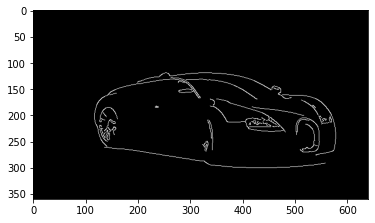

In [14]:
img_canny = cv.Canny(img_gray, 200, 200*2)

plt.imshow(img_canny, cmap='gray')
plt.show()

We now need to find the bounding box around the item in the image that we want to crop. The first step in doing this is to utilize the [findContours](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a) function. This function returns a list of contours found in the output of the Canny algorithm. The contours are defined by lists of $(x, y)$ values.

In [15]:
contours, _ = cv.findContours(img_canny, cv.RETR_TREE,
                                 cv.CHAIN_APPROX_SIMPLE)

print(len(contours))
print(contours[0])

39
[[[136 261]]

 [[144 261]]

 [[145 262]]

 [[150 262]]

 [[151 263]]

 [[159 263]]

 [[160 264]]

 [[174 264]]

 [[175 265]]

 [[182 265]]

 [[183 266]]

 [[190 266]]

 [[191 267]]

 [[197 267]]

 [[198 268]]

 [[203 268]]

 [[204 269]]

 [[210 269]]

 [[211 270]]

 [[215 270]]

 [[216 271]]

 [[221 271]]

 [[222 272]]

 [[227 272]]

 [[228 273]]

 [[234 273]]

 [[235 274]]

 [[241 274]]

 [[242 275]]

 [[246 275]]

 [[247 276]]

 [[251 276]]

 [[252 277]]

 [[259 277]]

 [[260 278]]

 [[266 278]]

 [[267 279]]

 [[272 279]]

 [[273 280]]

 [[278 280]]

 [[279 281]]

 [[284 281]]

 [[285 282]]

 [[291 282]]

 [[292 283]]

 [[298 283]]

 [[299 284]]

 [[302 284]]

 [[303 285]]

 [[309 285]]

 [[310 286]]

 [[317 286]]

 [[318 287]]

 [[326 287]]

 [[329 290]]

 [[330 290]]

 [[332 292]]

 [[333 292]]

 [[334 293]]

 [[335 293]]

 [[336 294]]

 [[338 294]]

 [[339 295]]

 [[347 295]]

 [[348 296]]

 [[359 296]]

 [[360 297]]

 [[366 297]]

 [[367 298]]

 [[368 297]]

 [[369 297]]

 [[

Given the contours, we can approximate the polygon that the contour forms and then create a bounding box around each contour.

In [18]:
bounding_boxes = []
contours_poly = []

for contour in contours:
  polygon = cv.approxPolyDP(contour, 3, True)
  contours_poly.append(polygon)
  bounding_boxes.append(cv.boundingRect(polygon))

print(len(contours_poly))
print(len(bounding_boxes))
print(bounding_boxes)

39
39
[(136, 261, 423, 39), (326, 258, 4, 3), (323, 249, 11, 21), (146, 234, 1, 13), (134, 228, 8, 16), (130, 225, 4, 11), (142, 222, 17, 26), (127, 219, 16, 32), (514, 217, 30, 51), (412, 214, 4, 5), (439, 212, 16, 9), (427, 212, 11, 7), (417, 209, 7, 8), (335, 209, 8, 58), (333, 209, 9, 36), (505, 208, 23, 25), (136, 208, 21, 23), (146, 210, 12, 5), (130, 206, 8, 4), (503, 205, 45, 66), (436, 205, 8, 6), (565, 201, 6, 13), (567, 205, 3, 9), (545, 201, 21, 17), (134, 195, 7, 9), (127, 185, 35, 28), (418, 184, 100, 17), (233, 183, 7, 3), (235, 184, 1, 1), (512, 171, 33, 29), (338, 169, 145, 64), (338, 169, 9, 13), (146, 158, 14, 4), (459, 148, 11, 3), (456, 144, 122, 133), (292, 132, 137, 38), (117, 128, 203, 132), (287, 137, 1, 1), (199, 119, 256, 34)]


Let's take a look at all of the bounding boxes on the car.

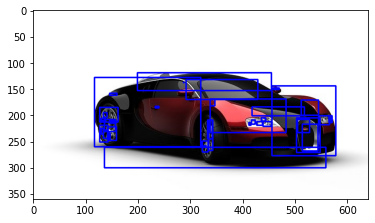

In [20]:
import numpy as np

image_copy = np.copy(image)

#x, y, width, height = largest_box
for box in bounding_boxes:
  cv.rectangle(image_copy, 
               (box[0], box[1]), (box[0]+box[2], box[1]+box[3]),
               [0, 0, 255],
               2)

_ = plt.imshow(image_copy)

No single box seems to capture the entire car, but we can use the outer boundaries to find a unified box.

We'll use a very simple algorithm that simply finds the outer boundaries and doesn't care if the boxes overlap. In practice you'd likely want to use a more sophisticated algorithm.

In [21]:
x1, y1, x2, y2 = 640, 640, 0, 0

for box in bounding_boxes:
  if box[0] < x1:
    x1 = box[0]
  if box[1] < y1:
    y1 = box[1]
  if box[0] + box[2] > x2:
    x2 = box[0] + box[2]
  if box[1] + box[3] > y2:
    y2 = box[1] + box[3]

x1, y1, x2, y2

(117, 119, 578, 300)

And then we can draw the box.

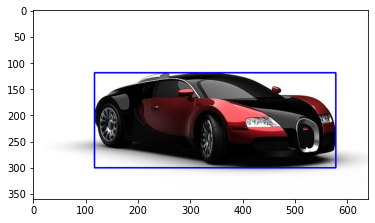

In [22]:
import numpy as np

image_copy = np.copy(image)

cv.rectangle(image_copy, 
             (x1, y1), (x2, y2),
             [0, 0, 255],
             2)

_ = plt.imshow(image_copy)

The box does clip the car a bit, but for the most part, the car is within the box.

Now we need to crop the image to just the car itself.

Notice that we pair the `x` coordinate with `height` and the `y` with `width`. This is because we want all of the rows for a given height and the columns for a given width.

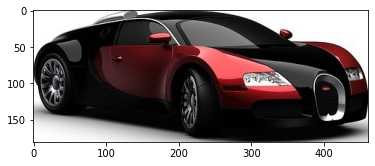

In [24]:
#x, y, width, height = largest_box
cropped_img = image[y1:y2, x1:x2]
_ = plt.imshow(cropped_img)

Now we need to make the image into a square by padding the image. We find the longest side and then pad the shorter side with the necessary pixels to make the image a square.

To add the padding we use OpenCV's `copyMakeBorder` function.

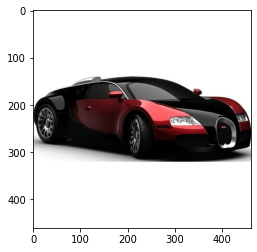

In [25]:
height = cropped_img.shape[0]
width = cropped_img.shape[1]

left_pad, right_pad, top_pad, bottom_pad = 0, 0, 0, 0
if height > width:
  left_pad = int((height-width) / 2)
  right_pad = height-width-left_pad
elif width > height:
  top_pad = int((width-height) / 2)
  bottom_pad = width-height-top_pad

img_square = cv.copyMakeBorder(
    cropped_img,
    top_pad,
    bottom_pad,
    left_pad,
    right_pad,
    cv.BORDER_CONSTANT,
    value=(255,255,255))

_ = plt.imshow(img_square)

And finally, we can scale the image down to a 300x300 image to feed to our model using OpenCV's `resize` function again.

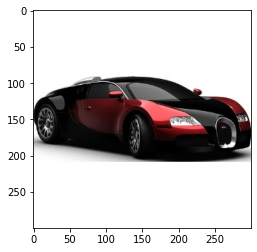

In [26]:
image_scaled = cv.resize(img_square, (300, 300))

plt.imshow(image_scaled)
plt.show()

## Rotating Images

It is sometimes useful to rotate images before feeding them to your model. This increases the size of your training data, and it makes your model more resilient to subtle patterns that might exist within your base images.
 
For example, in a popular fashion image dataset, most boots are pointed in one direction and sandals in the other. When the model attempts to identify a boot pointed in the wrong direction, it will often predict 'sandal' based purely on the orientation of the object.
 
To flip an image on the horizontal or vertical axis, we can just use the `flip` function.
 
Here is an example of flipping an image on the horizontal axis.

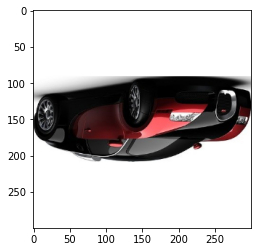

In [27]:
horizontal_img = cv.flip(image_scaled, 0)
plt.imshow(horizontal_img)
plt.show()

And now the vertical axis.

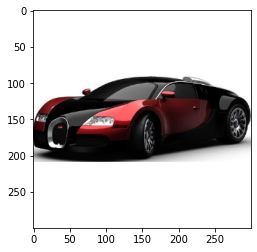

In [28]:
vertical_img = cv.flip(image_scaled, 1)
plt.imshow(vertical_img)
plt.show()

And finally, both.

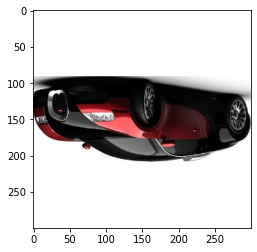

In [29]:
horizontal_and_vertical_img = cv.flip(image_scaled, -1)
plt.imshow(horizontal_and_vertical_img)
plt.show()

# Resources

* [OpenCV Documentation on Edge Detection](https://docs.opencv.org/3.4/da/d0c/tutorial_bounding_rects_circles.html)
* Canny Edge Detector: [Wikipedia](https://en.wikipedia.org/wiki/Canny_edge_detector), [OpenCV Documentation](https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html)

# Exercises

## Exercise 1

We have seen how to rotate an image on its horizontal and vertical axes. This technique works well for increasing the size of your training set and the capabilities of your model, while also providing resiliency to biases that might be hidden in your data.

It is also possible to rotate an image by different angles.

Use OpenCV to take our `image_scaled` image from above and rotate it so that the car is angled at 45 degrees. Do this for every corner of the squared image.
 
There should be eight images in total. The order of the images isn't important, but the variety is. There should be one image for each case below:
 
1. Car pointed to the top-left corner of the image
1. Upside-down car pointed to the top-left corner of the image
1. Car pointed to the top-right corner of the image
1. Upside-down car pointed to the top-right corner of the image
1. Car pointed to the bottom-left corner of the image
1. Upside-down car pointed to the bottom-left corner of the image
1. Car pointed to the bottom-right corner of the image
1. Upside-down car pointed to the bottom-right corner of the image

Display the images using `matplotlib.pyplot`.
 
Hint: Check out the `getRotationMatrix2D` and `warpAffine` methods.


### **Student Solution**

(150.0, 150.0)


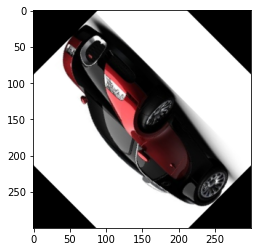

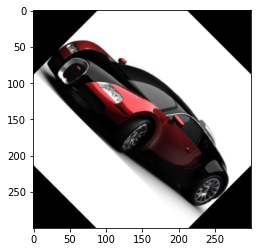

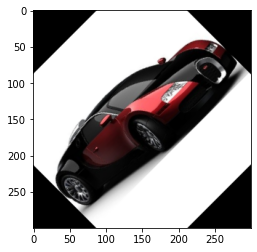

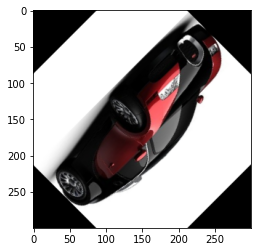

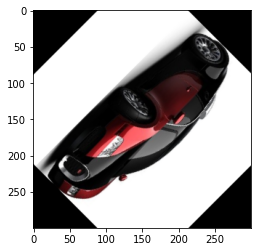

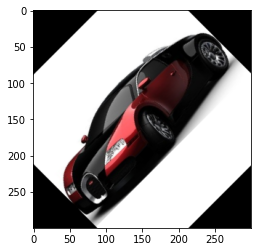

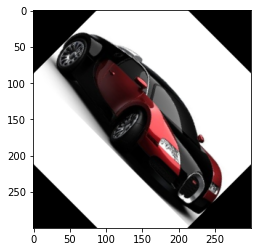

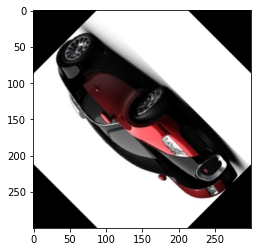

In [42]:

angles =[135,45,225,315]
imageCenter = tuple(np.array(image_scaled.shape[1::-1]) / 2)
print(imageCenter)

for i in range(len(angles)):
    rot_mat = cv.getRotationMatrix2D(imageCenter,angles[i], 1.0)
    result = cv.warpAffine(image_scaled, rot_mat, image_scaled.shape[1::-1], flags=cv.INTER_LINEAR)
    result_2 = cv.warpAffine(horizontal_img, rot_mat, image_scaled.shape[1::-1], flags=cv.INTER_LINEAR)
    plt.imshow(result)
    plt.show()
    plt.imshow(result_2)
    plt.show()


    







---